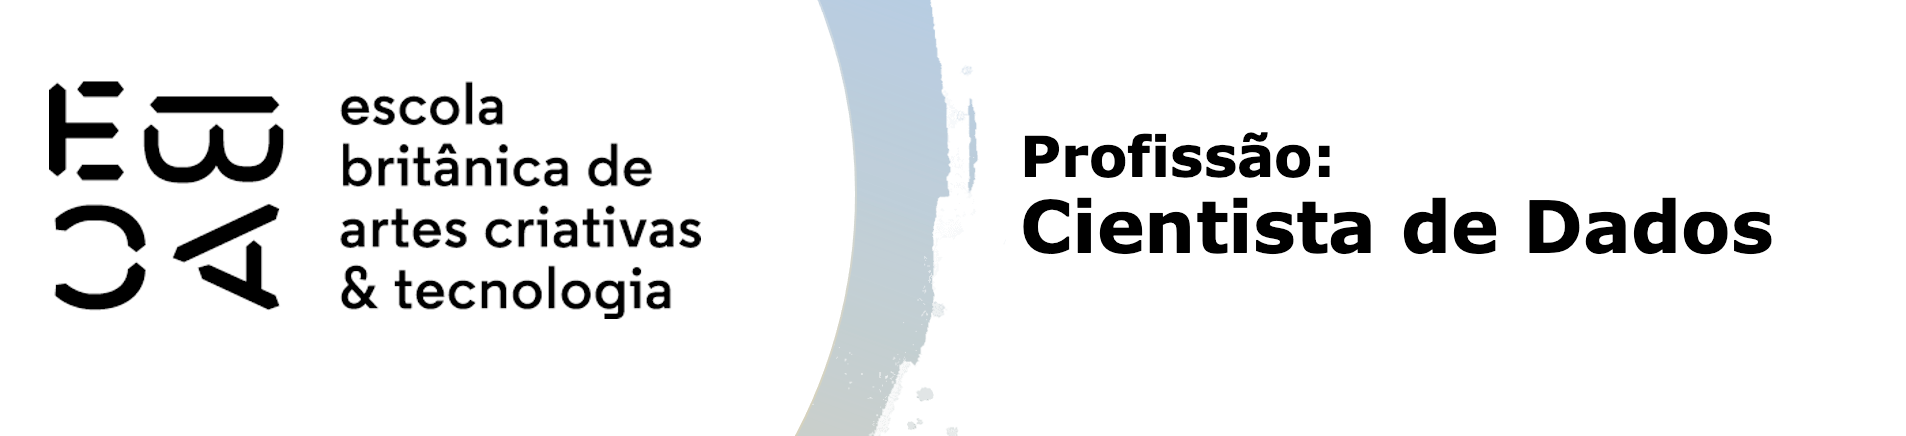

# Tarefa II

Ainda sobre a base da NFP vista na tarefa passada:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:

df = pd.read_pickle('base_nfp.pkl')
df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes


## Criando variáveis

**Variáveis temporais**: É possível que haja alguma regra de liberação de créditos de acordo com o dia do mês, o dia da semana, fim de semana (sim ou não), ou até alterações temporais da regra. Vamos criar as seguintes variáveis para testar estas hipóteses:

- Dia da semana
- Dummy para fim de semana
- Dia do mês
- Mês (já na base)
- Trimestre
- Ano (já na base)

**Valor da nota**: Vamos criar também algumas variáveis para resumir o valor da nota, e posteriormente criar uma intuição sobre categorizações de variáveis contínuas.

- Crie categorizações da variável ```Valor NF```, por quantís, em 5, 10, 20 e 50 categorias.

In [3]:
#Tranformar em date-time
df['Data Registro'] = pd.to_datetime(df['Data Registro'])

In [4]:
# nome dos dias da semana
df['dia_semana'] = df['Data Registro'].dt.day_name()

In [5]:
# usar os numeros dos dias da semana para pegar os que são fins da semana
df['dia_da_semana_num'] = df['Data Registro'].dt.weekday
df['fins_de_semana'] = df['dia_da_semana_num'] >= 5

In [6]:
df['dia_mes'] = df['Data Registro'].dt.day

In [7]:
df['mes'] = df['Data Registro'].dt.month

In [8]:
df['trimestre'] = df['Data Registro'].dt.quarter

In [9]:
df['valor_5'] = pd.qcut(df['Valor NF'], 5, labels=False)

In [10]:
df['valor_10'] =pd.qcut(df['Valor NF'], 10, labels=False)

In [11]:
df['valor_20'] =pd.qcut(df['Valor NF'], 20, labels=False)

In [12]:
df['valor_50'] =pd.qcut(df['Valor NF'], 50, labels=False)

In [13]:
df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,...,dia_semana,dia_da_semana_num,fins_de_semana,dia_mes,mes,trimestre,valor_5,valor_10,valor_20,valor_50
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,...,Friday,4,False,30,6,2,1,3,7,17
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,...,Friday,4,False,30,6,2,2,5,11,28
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,...,Friday,4,False,30,6,2,1,3,7,19
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,...,Friday,4,False,30,6,2,3,7,15,38
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,...,Friday,4,False,30,6,2,3,7,15,39


## Calcule o IV de todas essas variáveis

Sugestão: Construa um metadados e tente utilizar uma função como a que foi utilizada durante a aula. Você vai conseguir fazer esse cálculo para as variáveis uma a uma, mas em casos reais em que vamos mais além na criação de variáveis, podemos ter centenas, ou até milhares de variáveis, esses cálculos *precisam* ser automáticos nesses casos.

In [20]:
df2 = df.drop(columns=['categoria','No.', 'Emitente', 'CNPJ emit.', 'Situação do Crédito','Retorno','Créditos','Data Emissão','Valor NF','Data Registro','dia_semana'])
metadados = pd.DataFrame({'dtype':df2.dtypes})
metadados

,dtype
Ano,int64
Semestre,int64
flag_credito,int64
dia_da_semana_num,int64
fins_de_semana,bool
dia_mes,int64
mes,int64
trimestre,int64
valor_5,int64
valor_10,int64


In [21]:
metadados['papel'] = 'covariavel'
metadados.loc['flag_credito','papel'] = 'resposta'
metadados['nunique'] = df2.nunique()
metadados

,dtype,papel,nunique
Ano,int64,covariavel,5
Semestre,int64,covariavel,2
flag_credito,int64,resposta,2
dia_da_semana_num,int64,covariavel,7
fins_de_semana,bool,covariavel,2
dia_mes,int64,covariavel,31
mes,int64,covariavel,12
trimestre,int64,covariavel,4
valor_5,int64,covariavel,5
valor_10,int64,covariavel,10


In [22]:
#calculo de IV
def IV(variavel, resposta):
    tab = pd.crosstab(variavel, resposta, margins=True, margins_name='total')

    rótulo_evento = tab.columns[0]
    rótulo_nao_evento = tab.columns[1]

    tab['pct_evento'] = tab[rótulo_evento]/tab.loc['total',rótulo_evento]
    tab['pct_nao_evento'] = tab[rótulo_nao_evento]/tab.loc['total',rótulo_nao_evento]
    tab['woe'] = np.log(tab.pct_evento/tab.pct_nao_evento)
    tab['iv_parcial'] = (tab.pct_evento - tab.pct_nao_evento)*tab.woe
    return tab['iv_parcial'].sum()

In [23]:
# Cálculo de IV para cada variável
for var in metadados[metadados.papel == 'covariavel'].index:
    try:
        
            metadados.loc[var, 'IV'] = IV(df2[var], df2.flag_credito)
    except Exception as e:
        metadados.loc[var, 'IV'] = np.nan
        print(f"Erro ao processar a variável {var}: {e}")

print(metadados)

                   dtype       papel  nunique        IV
Ano                int64  covariavel        5  0.041651
Semestre           int64  covariavel        2  0.001258
flag_credito       int64    resposta        2       NaN
dia_da_semana_num  int64  covariavel        7  0.015175
fins_de_semana      bool  covariavel        2  0.009097
dia_mes            int64  covariavel       31  0.072750
mes                int64  covariavel       12  0.027970
trimestre          int64  covariavel        4  0.004030
valor_5            int64  covariavel        5  0.056695
valor_10           int64  covariavel       10  0.106650
valor_20           int64  covariavel       20  0.124525
valor_50           int64  covariavel       50  0.152315


## Conclua

- Quais variáveis parecem apresentar maior poder de discriminação segundo o IV?
- Quando categorizamos variáveis contínuas parece haver alguma relação entre o número de categorias e o IV?

As variaveis mais imporantes são o ano e os valores.

Quando aumentamos a quantidade de categorias o IV aumenta, isso faz sentido pois conseguimos descrever com mais granularidade o que esta occorendo em relação aquela variavel.

## Descritiva simples no tempo

Para compor a análise que virá a seguir, faça uma análise descritiva básica no tempo - utilize trimestre como agregação (ou uma média móvel por trimestre, como preferir) e avalie graficamente:

- A quantidade de notas registradas na base por período
- A quantidade de notas por categoria e por período
- A proporção de notas com crédito por categoria por período

In [50]:
tab = pd.crosstab(df.trimestre,df.flag_credito, margins=True, margins_name='total')

tab

flag_credito,0,1,total
trimestre,,,
1,19939,16132,36071
2,23798,18824,42622
3,30946,24033,54979
4,28325,25649,53974
total,103008,84638,187646


In [51]:
tab = pd.crosstab([df['categoria'], df['trimestre']], df['flag_credito'], margins=True, margins_name='total')
tab['proporcao'] = tab[1]/tab['total']
tab

flag_credito                 0      1   total  proporcao
categoria    trimestre                                  
Alimentos    1             439   3208    3647   0.879627
             2             553   4253    4806   0.884935
             3             534   3046    3580   0.850838
             4             566   2361    2927   0.806628
Auto posto   1             979     54    1033   0.052275
             2             570     60     630   0.095238
             3            1075     89    1164   0.076460
             4             794     68     862   0.078886
Construção   1            4374   3031    7405   0.409318
             2            3605   2844    6449   0.440999
             3            5643   3262    8905   0.366311
             4            4803   4674    9477   0.493194
Farmácia     1            2360    911    3271   0.278508
             2            2530   1130    3660   0.308743
             3            2618   1320    3938   0.335196
             4            2546   1525    4071   0.374601
Mercado      1            5374   4207    9581   0.439098
             2            5294   4347    9641   0.450887
             3            5428   5022   10450   0.480574
             4            6791   6232   13023   0.478538
Restaurantes 1            1940   1770    3710   0.477089
             2            5657   3294    8951   0.368004
             3            9360   6819   16179   0.421472
             4            5674   5235   10909   0.479879
Varejo       1             868    208    1076   0.193309
             2            1223    225    1448   0.155387
             3            1301    282    1583   0.178143
             4            1477    320    1797   0.178075
Vestuário    1             368    279     647   0.431221
             2             420    388     808   0.480198
             3             408    547     955   0.572775
             4             617    585    1202   0.486689
não definido 1            3237   2464    5701   0.432205
             2            3946   2283    6229   0.366511
             3            4579   3646    8225   0.443283
             4            5057   4649    9706   0.478982
total                   103008  84638  187646   0.451051

In [34]:
# Removendo a linha total para o gráfico
tab = tab.drop('total')

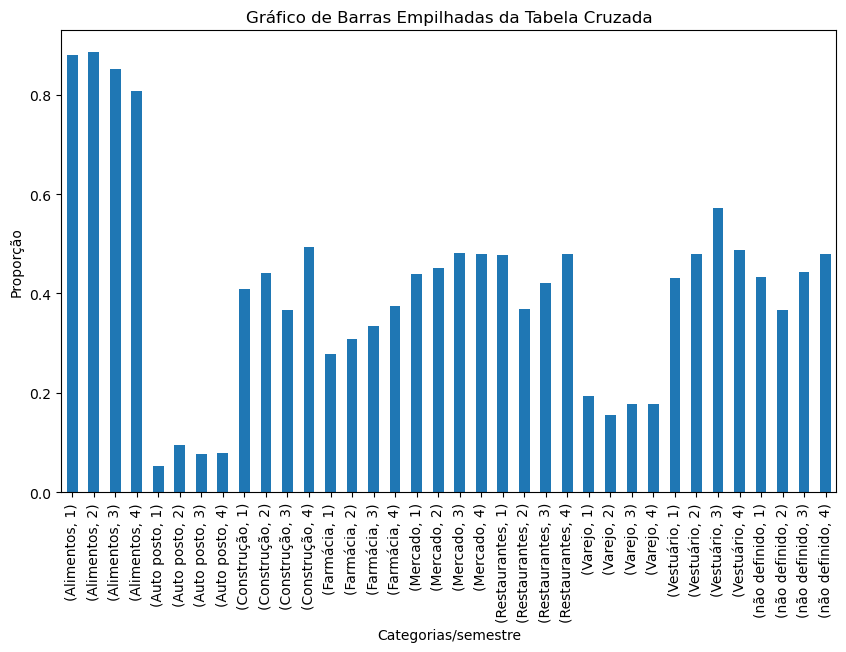

In [44]:

# Plotando gráfico de barras empilhadas
tab['proporcao'].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Gráfico de Barras Empilhadas da Tabela Cruzada")
plt.ylabel("Proporção")
plt.xlabel("Categorias/quadrimestre")
plt.show()

## Avalie o WOE e o IV no tempo

Avalie o WOE e o IV no tempo da variável ```categoria```.

In [104]:
tab2 = df[['Ano','mes','dia_mes','categoria','flag_credito','Data Registro']]

tab2

,Ano,mes,dia_mes,categoria,flag_credito,Data Registro
0,2017,6,30,Mercado,0,2017-06-30
1,2017,6,30,Auto posto,0,2017-06-30
2,2017,6,30,Restaurantes,1,2017-06-30
3,2017,6,30,Restaurantes,1,2017-06-30
4,2017,6,30,Restaurantes,1,2017-06-30
...,...,...,...,...,...,...
187641,2021,1,7,não definido,0,2021-01-07
187642,2021,1,7,Mercado,0,2021-01-07
187643,2021,1,7,Farmácia,0,2021-01-07
187644,2021,1,7,Mercado,0,2021-01-07


In [105]:
tab2 = pd.crosstab([df['categoria'], df['Ano'], df['mes']], df['flag_credito'], margins=True, margins_name='total')
tab2['tx_evento'] = tab2[1]/tab2['total']
tab2['pct_evento'] = tab2[1]/tab2[1].groupby(level=0).sum()
tab2['pct_nao_evento'] = tab2[0]/tab2[0].groupby(level=0).sum()
tab2['WOE'] = np.log(tab2.pct_evento/tab2.pct_nao_evento)
tab2 = tab2.drop('total')
tab2.head()



C:\Users\eric_\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


flag_credito        0    1  total  tx_evento  pct_evento  pct_nao_evento  \
categoria Ano  mes                                                         
Alimentos 2017 1    4  243    247   0.983806    0.018884        0.001912   
               2    4  488    492   0.991870    0.037924        0.001912   
               3    9  533    542   0.983395    0.041421        0.004302   
               4    1  252    253   0.996047    0.019583        0.000478   
               5    2  872    874   0.997712    0.067765        0.000956   

flag_credito             WOE  
categoria Ano  mes            
Alimentos 2017 1    2.290144  
               2    2.987398  
               3    2.264674  
               4    3.712806  
               5    4.261019

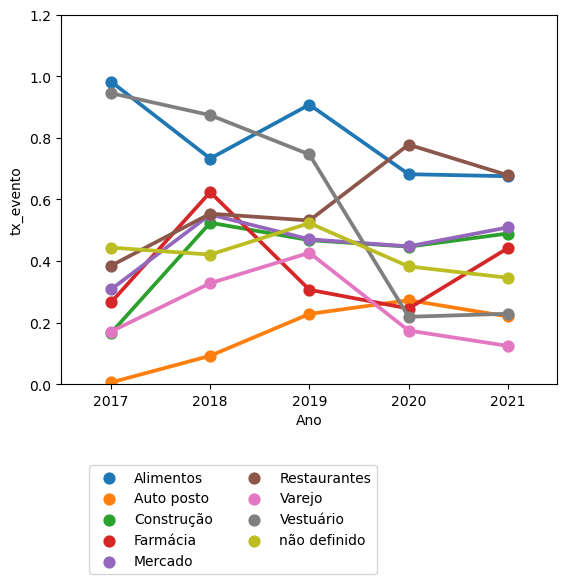

In [112]:
fig, ax = plt.subplots()

sns.pointplot(data=tab2.reset_index(), x='Ano', y='tx_evento', hue='categoria', errorbar=None, ax=ax)
ax.set_ylim([0, tab2.tx_evento.max()*1.2]);

# Configurar rótulos do eixo X
labs = tab2.index.get_level_values(level=0).unique()

ax.legend(bbox_to_anchor=(.65, -.2), ncol=2)

In [94]:
((tab2.pct_evento - tab2.pct_nao_evento)*tab2.WOE)

categoria     Ano 
Alimentos     2017    0.832115
              2018    0.027761
              2019    0.145020
              2020    0.243772
              2021    0.283248
Auto posto    2017    2.135306
              2018    0.011310
              2019    0.383831
              2020    0.329556
              2021    0.221194
Construção    2017    0.154063
              2018    0.005181
              2019    0.000752
              2020    0.001399
              2021    0.015541
Farmácia      2017    0.074028
              2018    0.038589
              2019    0.002046
              2020    0.044944
              2021    0.097885
Mercado       2017    0.055824
              2018    0.008985
              2019    0.000054
              2020    0.001331
              2021    0.010289
Restaurantes  2017    0.024188
              2018    0.000228
              2019    0.011170
              2020    0.075518
              2021    0.026371
Varejo        2017    0.000712
              2018  

<AxesSubplot:xlabel='Ano'>

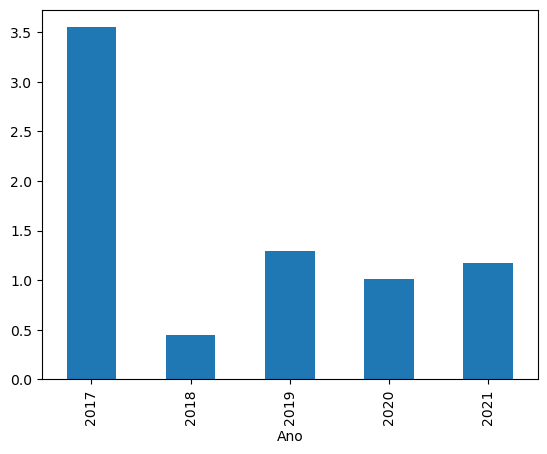

In [96]:
iv_categoria = ((tab2.pct_evento - tab2.pct_nao_evento)*tab2.WOE).groupby(level=1).sum();
iv_categoria.plot.bar()

## Conclua

- Quais categorias parece ter maior proporção de notas com retornos maiores que zero?
- Essas diferenças são estáveis no tempo?

Dicas:<br>
- Considere que a quantidade de notas vem aumentando
- Considere que há períodos bem atípicos no histórico
- Considere que a partir de janeiro de 2020 o público é mais parecido com o público atual (2022), seja por pandemia, seja por crescimento do público, e considere os dados dessa data em diante na sua conclusão.

**A categoria com a maior proporção de notas com retorno maior que zero é a categoria de Alimentos. Essa taxa caiu ao longo dos anos, mas se estabilizou em 2020, mantendo um patamar constante. Isso pode ser atribuído aos pedidos por aplicativos durante a pandemia, onde os consumidores podem cadastrar um CPF e mantê-lo para compras futuras. Essa estabilidade se manteve porque aqueles que não cadastraram um CPF provavelmente não o farão, e aqueles que já o fizeram não irão removê-lo. Dependendo do tipo de cadastro do estabelecimento, poderíamos fazer essa mesma análise para Restaurantes, onde houve um aumento significativo durante a pandemia e nos anos posteriores.**

**A categoria de Vestuário teve uma queda considerável. Devido à inflação e à crise econômica da época, essa categoria foi deixada em segundo plano. Além disso, é um tipo de compra que as pessoas preferem realizar presencialmente, o que não foi possível em 2020 devido à pandemia.**

